In [1]:
import pandas as pd
import numpy as np
import itertools
from itertools import cycle

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import label_binarize

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import roc_curve, roc_auc_score, auc, f1_score, accuracy_score, confusion_matrix
from xgboost import plot_importance
from scipy import interp

%matplotlib inline

In [2]:
data = pd.read_csv(r'C:\Users\Chetan\Desktop\College\Python\EDM Sub-genre classifier\songs.csv')

features = ['acousticness', 'instrumentalness', 'speechiness', 'danceability', 
            'liveness', 'valence', 'energy', 'loudness',
            'tempo', 'duration_ms']

genres = ['dnb', 'hardstyle','house', 'techno', 'trap']

In [3]:
data.drop(["Unnamed: 0"], axis = 1, inplace = True)
data.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,genre
0,0.806,0.540,1.0,-11.827,1.0,0.0744,0.019500,0.939,0.0411,0.294,125.009,360917.0,4.0,house
1,0.797,0.940,1.0,-5.410,1.0,0.0672,0.000595,0.768,0.5850,0.665,127.002,340158.0,4.0,house
2,0.818,0.847,0.0,-6.282,1.0,0.0989,0.000744,0.806,0.0694,0.689,125.015,430960.0,4.0,house
3,0.785,0.496,2.0,-4.166,1.0,0.0377,0.000040,0.485,0.1000,0.291,125.986,287619.0,4.0,house
4,0.803,0.925,11.0,-6.433,1.0,0.0627,0.000519,0.254,0.0462,0.774,124.006,338200.0,4.0,house


In [4]:
X = data[features].copy()
y = LabelEncoder().fit_transform(data["genre"])
data.drop(["genre"], axis = 1, inplace = True)
data.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.806,0.540,1.0,-11.827,1.0,0.0744,0.019500,0.939,0.0411,0.294,125.009,360917.0,4.0
1,0.797,0.940,1.0,-5.410,1.0,0.0672,0.000595,0.768,0.5850,0.665,127.002,340158.0,4.0
2,0.818,0.847,0.0,-6.282,1.0,0.0989,0.000744,0.806,0.0694,0.689,125.015,430960.0,4.0
3,0.785,0.496,2.0,-4.166,1.0,0.0377,0.000040,0.485,0.1000,0.291,125.986,287619.0,4.0
4,0.803,0.925,11.0,-6.433,1.0,0.0627,0.000519,0.254,0.0462,0.774,124.006,338200.0,4.0


In [5]:
print(y[5999:6001])

[3 0]


In [6]:
X.shape

(15000, 10)

In [7]:
y.shape

(15000,)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state = 1)
X_train1 = X_train

In [9]:
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = pd.DataFrame(scaler.transform(X_train), columns = X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

In [10]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):

    plt.figure(figsize=(8,8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

In [11]:
def one_hot_encoder(true_labels, num_records, num_classes):
    temp = np.array(true_labels[:num_records])
    true_labels = np.zeros((num_records, num_classes))
    true_labels[np.arange(num_records), temp] = 1
    return true_labels

In [12]:
def display_results(y_test, pred_probs, cm = True):
    pred = np.argmax(pred_probs, axis=-1)
    one_hot_true = one_hot_encoder(y_test, len(pred), len(genres))
    print('Test Set Accuracy =  {0:.3f}'.format(accuracy_score(y_test, pred)))
    print('Test Set F-score =  {0:.3f}'.format(f1_score(y_test, pred, average='macro')))
    print('ROC AUC = {0:.3f}'.format(roc_auc_score(y_true=one_hot_true, y_score=pred_probs, average='macro')))
    if cm:
        plot_confusion_matrix(confusion_matrix(y_test, pred), classes = genres)

Test Set Accuracy =  0.845
Test Set F-score =  0.844
ROC AUC = 0.968
Confusion matrix, without normalization
[[598   1   0   0   1]
 [  1 479   0  29  91]
 [  0   5 502  93   0]
 [  0   4  64 529   3]
 [ 15 146   2  10 427]]


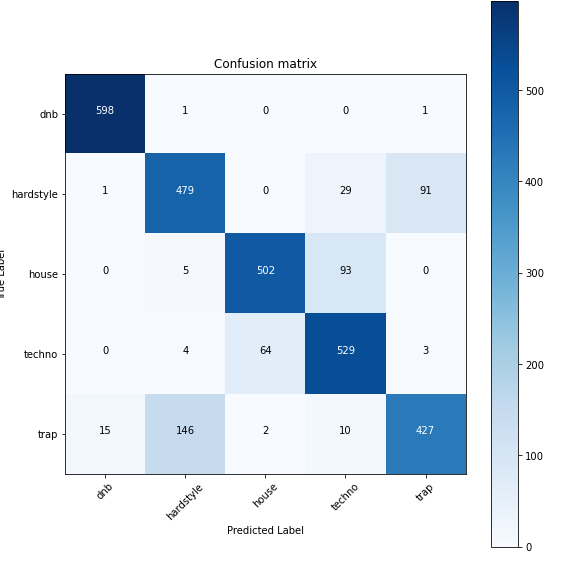

In [13]:
# Train logistic regression model
logreg = LogisticRegression(penalty='l2', max_iter=10000, multi_class='ovr')
logreg.fit(X_train, y_train)

# Genre prediction and probabilities of each genre
logreg_probs = logreg.predict_proba(X_test)

# Display Results
display_results(y_test, logreg_probs, cm=True)

Test Set Accuracy =  0.875
Test Set F-score =  0.875
ROC AUC = 0.981
Confusion matrix, without normalization
[[597   3   0   0   0]
 [  0 525   0   4  71]
 [  0   0 516  84   0]
 [  0   4  69 519   8]
 [  0 125   0   6 469]]


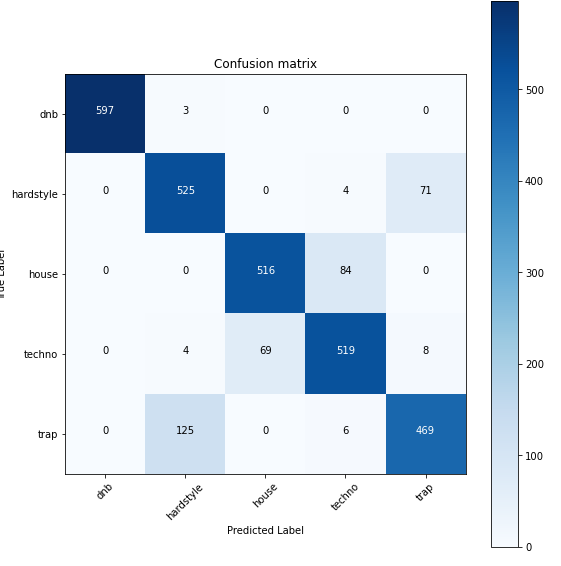

In [14]:
# Train model with optimal parameters
svm = SVC(gamma = 'auto', probability = True)
svm.fit(X_train, y_train)

# Genre Prediction
svm_probs = svm.predict_proba(X_test)

# Display results
display_results(y_test, svm_probs, cm = True)

[14:51:49] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Test Set Accuracy =  0.912
Test Set F-score =  0.912
ROC AUC = 0.990
Confusion matrix, without normalization
[[597   0   0   0   3]
 [  0 552   0   2  46]
 [  0   0 551  49   0]
 [  0   9  75 513   3]
 [  0  73   0   5 522]]


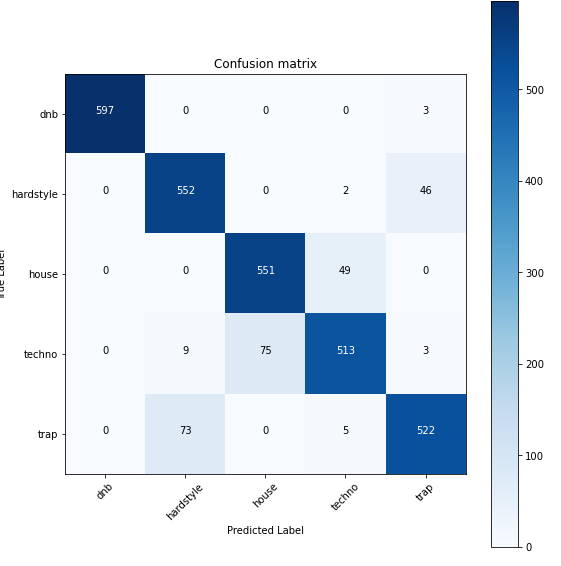

In [15]:
# Train model with optimal parameters
xgb = XGBClassifier(max_depth=10, learning_rate=0.01, objective='multi:softprob', 
                        n_estimators=500, sub_sample = 0.8, num_class = len(genres))
xgb.fit(X_train, y_train)

# Genre prediction 
xgb_probs = xgb.predict_proba(X_test)

# Display results
display_results(y_test, xgb_probs, cm=True)

Test Set Accuracy =  0.910
Test Set F-score =  0.910
ROC AUC = 0.989
Confusion matrix, without normalization
[[597   2   0   0   1]
 [  0 544   0   4  52]
 [  0   0 548  52   0]
 [  0   8  70 521   1]
 [  0  75   0   4 521]]


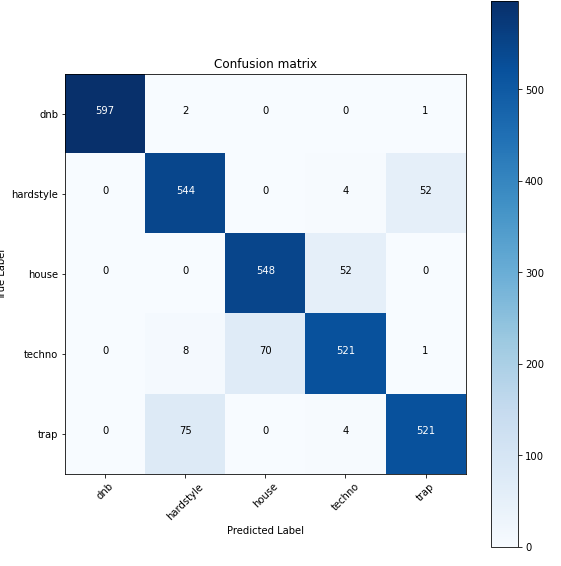

In [16]:
# Train random forest model with optimal parameters
rf = RandomForestClassifier(max_depth=25, min_samples_leaf=1, min_samples_split=5, n_estimators=1200)
rf.fit(X_train, y_train)

# Genre prediction 
rf_probs = rf.predict_proba(X_test)

# Display results
display_results(y_test, rf_probs, cm=True)

In [105]:
# Imports
import os
import sys
import pandas as pd
import numpy as np
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy.util as util

In [106]:
# Get the username from terminal
username = sys.argv[1]

os.environ['SPOTIPY_CLIENT_ID'] = '509f1c0827f94cd7af9c842beb26e7ef'
os.environ['SPOTIPY_CLIENT_SECRET'] = '83fe375561354e6485bde0e952dc5d70'
os.environ['SPOTIPY_REDIRECT_URI'] = 'http://localhost:8888/callback/'

cid = '509f1c0827f94cd7af9c842beb26e7ef' # Client ID
secret = '83fe375561354e6485bde0e952dc5d70'   # Client Secret ID
username = '21ugtw76ynask7ohvvz626ndq' # Spotify Username

scope = 'user-library-read playlist-modify-public playlist-read-private'
redirect_uri = 'http://localhost:8888/'
#http://localhost:8888/callback/

client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret) 
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
token = util.prompt_for_user_token(username, scope, cid, secret, redirect_uri)

if token:
    sp = spotipy.Spotify(auth=token)
else:
    print("Can't get token for", username)

In [115]:
track_id_test = "6fWl0naiszyqCbDL7l1NUq"
live_test = sp.audio_features(tracks = track_id_test)[0]
df_live = pd.DataFrame(live_test, index = [0])[features]

In [116]:
df_live

,acousticness,instrumentalness,speechiness,danceability,liveness,valence,energy,loudness,tempo,duration_ms
0,0.00498,0.00163,0.0351,0.564,0.18,0.057,0.831,-6.677,133.928,268778


In [117]:
X_train.iloc[35]

acousticness        0.000534
instrumentalness    0.656473
speechiness         0.047923
danceability        0.786441
liveness            0.020778
valence             0.210499
energy              0.761836
loudness            0.519677
tempo               0.130683
duration_ms         0.411952
Name: 35, dtype: float64

In [118]:
for i in range(10):

    df_live.iloc[:,i] = (df_live.iloc[:,i]  - np.min(X_train1.iloc[:,i]))/(np.max(X_train1.iloc[:,i])-np.min  (X_train1.iloc[:,i]))

In [119]:
df_live

,acousticness,instrumentalness,speechiness,danceability,liveness,valence,energy,loudness,tempo,duration_ms
0,0.005555,0.001662,0.012541,0.517514,0.171981,0.04005,0.757532,0.643991,0.274474,0.222561


In [120]:
live_prob_rf = rf.predict_proba(df_live)
pred_rf = np.argmax(live_prob_rf, axis=-1)
live_prob_xgb = xgb.predict_proba(df_live)
pred_xgb = np.argmax(live_prob_xgb, axis=-1)
live_prob_svm = svm.predict_proba(df_live)
pred_svm = np.argmax(live_prob_svm, axis=-1)
live_prob_logreg = logreg.predict_proba(df_live)
pred_logreg = np.argmax(live_prob_logreg, axis=-1)

In [121]:
pred_rf, pred_xgb, pred_svm, pred_logreg

(array([4], dtype=int64),
 array([3], dtype=int64),
 array([4], dtype=int64),
 array([1], dtype=int64))

In [122]:
# genres = ['dnb', 'hardstyle','house', 'techno', 'trap']